In [1]:
import numpy as np
import pandas as pd
import os
jpg_list=os.listdir('../input/siim-covid19-resized-to-256px-jpg/train')
train_data_df=pd.DataFrame(jpg_list)
train_data_df=train_data_df.reset_index()
train_data_df['image_id']=train_data_df[0]
train_data_df['process_run']=train_data_df['index']+1
del train_data_df[0]
del train_data_df['index']
train_data_df

,image_id,process_run
0,ca3940494328.jpg,1
1,3392e7be5830.jpg,2
2,b84d54b8f940.jpg,3
3,7f9ebbdae8b4.jpg,4
4,79b7ba0210bb.jpg,5
...,...,...
6329,4cf91b44af5b.jpg,6330
6330,2f700a7204cf.jpg,6331
6331,5709155133b4.jpg,6332
6332,41bbcaaf83a2.jpg,6333


In [2]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import sys
train_data_df['id']=train_data_df['image_id'].str.replace('.jpg','_image')
train_image_level=pd.read_csv('../input/siim-covid19-detection/train_image_level.csv')
train_study=pd.read_csv('../input/siim-covid19-detection/train_study_level.csv')
train_study['StudyInstanceUID']=train_study['id'].str.replace("_study", "")
del train_study['id']
train_data_df=pd.merge(train_data_df, train_image_level, how='inner')
train_data_df=pd.merge(train_data_df, train_study, how='inner')
train_data_df
del train_image_level
del train_study


var_dict={'Negative for Pneumonia': 1, 'Typical Appearance': 2, 'Indeterminate Appearance': 3, 'Atypical Appearance': 4}
train_data_df['categorical_train']=0
for key, value in var_dict.items():
    train_data_df['categorical_train']=train_data_df[[key, 'categorical_train']].apply(
        lambda x:value if x[key]==1 else x['categorical_train'], axis=1)

print(train_data_df[['Negative for Pneumonia', 'Typical Appearance', 'Indeterminate Appearance', 'Atypical Appearance', 'categorical_train']].drop_duplicates())
y_train=train_data_df['categorical_train'].to_numpy()
print(y_train.shape)
y_train

    Negative for Pneumonia  Typical Appearance  Indeterminate Appearance  \
0                        1                   0                         0   
1                        0                   0                         1   
2                        0                   1                         0   
22                       0                   0                         0   

    Atypical Appearance  categorical_train  
0                     0                  1  
1                     0                  3  
2                     0                  2  
22                    1                  4  
(6334,)


array([1, 3, 2, ..., 2, 2, 2])

In [3]:
import sys
from PIL import Image
from numpy import asarray
jpg_list_train=train_data_df['image_id'].to_list()
batchsize = 100
batch_num=0
numberf=0
X_train_full=np.empty([256, 256])
for i in range(0, len(jpg_list_train), batchsize):
    batch = jpg_list_train[i:i+batchsize]
    batch_num=1+batch_num
    print("Batch Num:", batch_num)
    start=time.time()
    X_train_batch=np.empty([256, 256])
    for i in batch:
        image = Image.open('../input/siim-covid19-resized-to-256px-jpg/train/{}'.format(i))
        data=asarray(image)
        X_train_batch=np.dstack([X_train_batch, data])
        numberf = numberf+1
        clear_output(wait=True)        
    X_train_batch=X_train_batch[0:, 0:, 1:]
    print(X_train_batch.shape)
    X_train_full=np.dstack([X_train_full, X_train_batch])
del X_train_batch

(256, 256, 34)


In [4]:
X_train_full=X_train_full[0:, 0:, 1:]
X_train_full=np.transpose(X_train_full, (2, 0, 1))
X_train_full.shape

(6334, 256, 256)

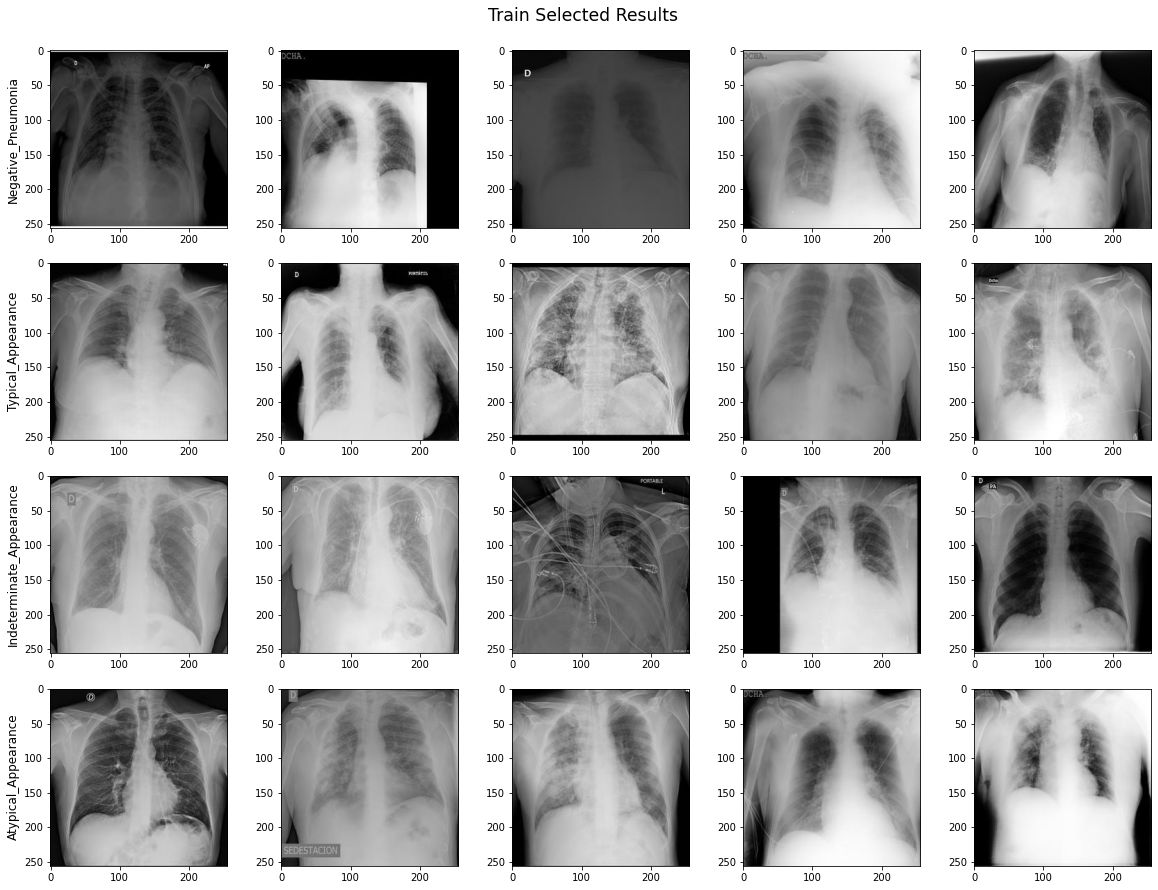

In [5]:
import random
train_data_df['categorical_train']=pd.to_numeric(train_data_df['categorical_train'])
var_dict2={'Negative_Pneumonia': 1, 'Typical_Appearance': 2, 'Indeterminate_Appearance': 3, 'Atypical_Appearance': 4}
var_dict3={}
count = 1
Negative_Pneumonia=random.sample(train_data_df['process_run'][train_data_df['categorical_train']==1].tolist(), 5)
Typical_Appearance=random.sample(train_data_df['process_run'][train_data_df['categorical_train']==2].tolist(), 5)
Indeterminate_Appearance=random.sample(train_data_df['process_run'][train_data_df['categorical_train']==3].tolist(), 5)
Atypical_Appearance=random.sample(train_data_df['process_run'][train_data_df['categorical_train']==4].tolist(), 5)
fig1, [(ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9), (ax10, ax11, ax12, ax13, ax14), (ax15, ax16, ax17, ax18, ax19)] = plt.subplots(4,5, figsize=(20,15))
fig1.suptitle('Train Selected Results', size='xx-large', y=.92)
ax0.set_ylabel('Negative_Pneumonia', rotation=90, size='large')
ax5.set_ylabel('Typical_Appearance', rotation=90, size='large')
ax10.set_ylabel('Indeterminate_Appearance', rotation=90, size='large')
ax15.set_ylabel('Atypical_Appearance', rotation=90, size='large')
axes1={ax0: Negative_Pneumonia, ax1: Negative_Pneumonia, ax2: Negative_Pneumonia, ax3: Negative_Pneumonia, ax4:Negative_Pneumonia,ax5:Typical_Appearance, ax6:Typical_Appearance, ax7:Typical_Appearance, ax8:Typical_Appearance, ax9:Typical_Appearance,\
       ax10:Indeterminate_Appearance, ax11:Indeterminate_Appearance, ax12:Indeterminate_Appearance, ax13:Indeterminate_Appearance, ax14:Indeterminate_Appearance,ax15:Atypical_Appearance, ax16:Atypical_Appearance, ax17:Atypical_Appearance, ax18:Atypical_Appearance, ax19:Atypical_Appearance}
loopvar=0
for key, value in axes1.items():
    if loopvar==4:
        loopvar=0
    else:
        loopvar=loopvar+1
    key.imshow(Image.fromarray(X_train_full[value[loopvar]]))

plt.show(fig1)

In [6]:
### this updated model is the basic way to address the issue while keeping the same simple CONV2D framework
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import img_to_array, load_img
# from keras import layers, models, optimizers
# from keras import backend as K
# from numpy import asarray
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop, Adam

keras.backend.clear_session()
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64,3,3,padding = 'same', activation ='relu', input_shape=(256,256,1)))
model.add(keras.layers.Conv2D(64,3,3,padding = "same", activation = "relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding = "same"))
model.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
model.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding = "same"))
model.add(keras.layers.Conv2D(256,3,3,padding = 'same', activation = 'relu'))
model.add(keras.layers.Conv2D(256,3,3,padding = 'same', activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding = "same"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 86, 86, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 128)         0

In [7]:
from keras.optimizers import Adam
model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=[tf.keras.metrics.categorical_accuracy])

In [8]:
y=train_data_df['categorical_train'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_full,y, test_size=0.2)

In [10]:
X_train=X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test=X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.flatten().shape)

(5067, 256, 256, 1)
(1267, 256, 256, 1)
(5067,)
(1267,)


In [12]:
history = model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
159/159 [==============================] - 10s 36ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 2/100
159/159 [==============================] - 4s 27ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 3/100
159/159 [==============================] - 4s 28ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 4/100
159/159 [==============================] - 4s 27ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 5/100
159/159 [==============================] - 5s 29ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 6/100
159/159 [==============================] - 5s 28ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 7/100
159/159 [======

In [13]:
pd.DataFrame(history.history)

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,NaN,1.0,NaN,1.0
1,NaN,1.0,NaN,1.0
2,NaN,1.0,NaN,1.0
3,NaN,1.0,NaN,1.0
4,NaN,1.0,NaN,1.0
...,...,...,...,...
95,NaN,1.0,NaN,1.0
96,NaN,1.0,NaN,1.0
97,NaN,1.0,NaN,1.0
98,NaN,1.0,NaN,1.0


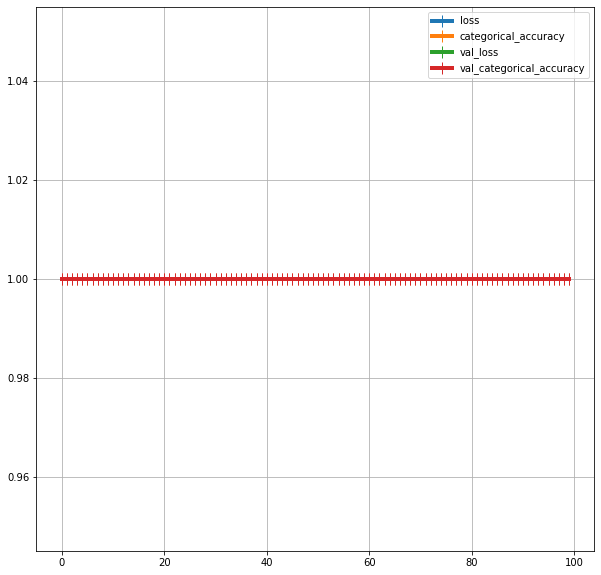

In [14]:
pd.DataFrame(history.history).plot(marker='|',markersize=12, figsize=(10,10), linewidth=4)
plt.grid(True)
plt.show()

In [15]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2
ERROR: No matching distribution found for cv2


In [16]:
from numpy import asarray
import cv2
jpg_list_test=os.listdir('../input/siim-covid19-resized-to-256px-jpg/test')
X_test = []
y_name = []
end1=0
for image in jpg_list_test:
    X_test.append(cv2.resize(cv2.imread('../input/siim-covid19-resized-to-256px-jpg/test/{}'.format(image)), (150,150), interpolation=cv2.INTER_CUBIC))
    clear_output(wait=True)
    end1=end1+1
    y_name.append(image)
    print('Images Processed:', end1)
    print('Percent Complete:', round((100*(end1/len(jpg_list_train))),2))

Images Processed: 1263
Percent Complete: 19.94


In [17]:
X_test=asarray(X_test)
# y=asarray(y, dtype='float32')
# x=np.transpose(x, (2, 1, 3, 0))
X_test.shape

(1263, 150, 150, 3)

In [18]:
# X_test=X_test[0:, 0:, 1:]
# X_test=np.transpose(X_test, (2, 0, 1))
X_test = X_test / 255
X_test.shape

(1263, 150, 150, 3)

In [19]:
y_test_pred=model.predict(X_test)
y_test_pred = y_test_pred.argmax(axis=-1)
y_predicition=pd.DataFrame(x_test)
y_predicition['y_predicition']=y_test_pred
# test=y_predicition[y_prediction].groupby(y_prediction).count()
# y4_predicition.to_csv(./y4_prediction.csv, index=False)
# example_test=pd.read_csv(./y4_prediction.csv)
y_predicition

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 150, 150, 3)


In [ ]:
import random
y_predicition=y_predicition.reset_index()
y_predicition['y_predicition']=pd.to_numeric(y_predicition['y_predicition'])
var_dict2={'Negative_Pneumonia': 1, 'Typical_Appearance': 2, 'Indeterminate_Appearance': 3, 'Atypical_Appearance': 4}
var_dict3={}
count = 1
for key, value in var_dict2.items():
    list1=y_predicition[y_predicition['y_predicition']==value]
    print(key, list1['index'].to_list())
    print()
    print()
Negative_Pneumonia=random.sample(y_predicition['index'][y_predicition['y_predicition']==1].tolist(), 5)
Typical_Appearance=random.sample(y_predicition['index'][y_predicition['y_predicition']==2].tolist(), 5)
Indeterminate_Appearance=random.sample(y_predicition['index'][y_predicition['y_predicition']==3].tolist(), 5)
Atypical_Appearance=random.sample(y_predicition['index'][y_predicition['y_predicition']==4].tolist(), 5)

In [ ]:
fig, [(ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9), (ax10, ax11, ax12, ax13, ax14), (ax15, ax16, ax17, ax18, ax19)] = plt.subplots(4,5, figsize=(20,15))
fig.suptitle('Test Selected Results', size='xx-large', y=.92)
ax0.set_ylabel('Negative_Pneumonia', rotation=90, size='large')
ax5.set_ylabel('Typical_Appearance', rotation=90, size='large')
ax10.set_ylabel('Indeterminate_Appearance', rotation=90, size='large')
ax15.set_ylabel('Atypical_Appearance', rotation=90, size='large')
axes1={ax0: Negative_Pneumonia, ax1: Negative_Pneumonia, ax2: Negative_Pneumonia, ax3: Negative_Pneumonia, ax4:Negative_Pneumonia,ax5:Typical_Appearance, ax6:Typical_Appearance, ax7:Typical_Appearance, ax8:Typical_Appearance, ax9:Typical_Appearance,\
       ax10:Indeterminate_Appearance, ax11:Indeterminate_Appearance, ax12:Indeterminate_Appearance, ax13:Indeterminate_Appearance, ax14:Indeterminate_Appearance,ax15:Atypical_Appearance, ax16:Atypical_Appearance, ax17:Atypical_Appearance, ax18:Atypical_Appearance, ax19:Atypical_Appearance}
loopvar=0
for key, value in axes1.items():
    if loopvar==4:
        loopvar=0
    else:
        loopvar=loopvar+1
    key.imshow(Image.fromarray(X_test[value[loopvar]]*255))
rows = ['Row {}'.format(row) for row in ['A', 'B', 'C', 'D']]

plt.show(fig)

In [ ]:
plt.show(fig1)